**Goodreads** is a popular social cataloging website based in the United States and is currently owned by Amazon. The website serves as a platform for book lovers to search through a vast database of books, annotations, quotes, and reviews. 

To analyze the data available on Goodreads, we can use Python libraries such as Beautiful Soup and Requests to scrape the website's data. Once we have the data, we can perform various analyses to gain insights into the books and their authors, ratings, and reviews.

## Load libraries

In [4]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Requesting data from website**

In [5]:
from requests import get
url = 'https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page=1'
response = requests.get(url)
html = response.content
html_soup = BeautifulSoup(html, "html.parser")
book_containers = html_soup.find_all('tr',itemtype="http://schema.org/Book")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
100


In [6]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [7]:
first_book = book_containers[0]
first_book

<tr itemscope="" itemtype="http://schema.org/Book">
<td class="number" valign="top">1</td>
<td valign="top" width="5%">
<div class="u-anchorTarget" id="1885"></div>
<div class="js-tooltipTrigger tooltipTrigger" data-resource-id="1885" data-resource-type="Book">
<a href="/book/show/1885.Pride_and_Prejudice" title="Pride and Prejudice">
<img alt="Pride and Prejudice" class="bookCover" itemprop="image" src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1320399351i/1885._SY75_.jpg"/>
</a> </div>
</td>
<td valign="top" width="100%">
<a class="bookTitle" href="/book/show/1885.Pride_and_Prejudice" itemprop="url">
<span aria-level="4" itemprop="name" role="heading">Pride and Prejudice</span>
</a> <br/>
<span class="by">by</span>
<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/1265.Jane_Austen" itemprop="url"><span itemprop="name">Jane Austen</s

In [8]:
book_containers = html_soup.find_all('div', class_ ="elementList")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
0


In [9]:
name = first_book.find('a',class_="bookTitle").text.strip()
authors = first_book.find('a',class_="authorName").text.strip()

scoring = first_book.find('span',class_="greyText smallText uitext").text.strip().split()
avg_scores=scoring[0]
rates = scoring[4]

voted= first_book.find('span',class_="smallText uitext").text.strip().split()
scores=voted[1]
vote=voted[3]




In [10]:
print("name:",name)
print("authors:",authors)
print("scoring:",scoring)
print("averae sores:",avg_scores)
print("ratings", rates)
print("scores:",scores)

print("votes:",vote)

name: Pride and Prejudice
authors: Jane Austen
scoring: ['4.28', 'avg', 'rating', '—', '3,893,021', 'ratings']
averae sores: 4.28
ratings 3,893,021
scores: 237,502,
votes: 2,403


In [11]:
page = 1
names = []
ratings = []
avgscores = []
author=[]
score=[]
votes=[]
while page != 51:
    url = f"https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page={page}"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "html.parser")
    book_containers = soup.find_all('tr', itemtype="http://schema.org/Book")
    for container in book_containers:
        if container.find('td', width= '100%') is not None:
            name = container.find('a',class_="bookTitle").text.strip()
            names.append(name)
            authors = container.find('a',class_="authorName").text.strip()
            author.append(authors)
            scoring = container.find('span',class_="greyText smallText uitext").text.strip().split()
            ascores=scoring[0]
            avgscores.append(ascores)
            rates = scoring[4]
            ratings.append(rates)
            voted= container.find('span',class_="smallText uitext").text.strip().split()        
            scores=voted[1]
            score.append(scores)
            vote=voted[3]
            votes.append(vote)
    page = page + 1

In [12]:
names

['Pride and Prejudice',
 'Fifty Shades of Grey (Fifty Shades, #1)',
 'Beautiful Disaster (Beautiful, #1)',
 'Twilight (The Twilight Saga, #1)',
 'The Notebook (The Notebook, #1)',
 'Perfect Chemistry (Perfect Chemistry, #1)',
 'Outlander (Outlander, #1)',
 'Jane Eyre',
 'Thoughtless (Thoughtless, #1)',
 'Bared to You (Crossfire, #1)',
 'Easy (Contours of the Heart, #1)',
 'Gone with the Wind',
 "Gabriel's Inferno (Gabriel's Inferno, #1)",
 "The Time Traveler's Wife",
 'Slammed (Slammed, #1)',
 'Anna and the French Kiss (Anna and the French Kiss, #1)',
 'Vampire Academy (Vampire Academy, #1)',
 'A Walk to Remember',
 'Dark Lover (Black Dagger Brotherhood, #1)',
 'Wuthering Heights',
 'Hush, Hush (Hush, Hush, #1)',
 'The Fault in Our Stars',
 'Sense and Sensibility',
 'Persuasion',
 'The Host (The Host, #1)',
 'Divergent (Divergent, #1)',
 'City of Bones (The Mortal Instruments, #1)',
 'Obsidian (Lux, #1)',
 'Love Unscripted (Love, #1)',
 'On the Island (On the Island, #1)',
 'Hopeless (

## Reading data

In [15]:
import pandas as pd
df = pd.DataFrame({'book title': names,
'ratings': ratings,
'avg_score': avgscores,
'author': author,
'score' : score,
'votes': votes
})
data=df # storing in another variable just not run requeste content again and again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4999 non-null   object
 1   ratings     4999 non-null   object
 2   avg_score   4999 non-null   object
 3   author      4999 non-null   object
 4   score       4999 non-null   object
 5   votes       4999 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB
None


**Detailed View of Data Columns:**

- Book Title: The name of the book.
- Ratings: The number of people who rated this book.
- Avg_Score: The average rating is a measure of what a given customer base or population on average rates.
- Author: The name of the book's author.
- Score: A book's total score is based on multiple factors, including the number of people who have voted for it and how highly those voters ranked the book.

In [16]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,893,021",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,409,887",3.66,E.L. James,"231,036,","2,343"
2,"Beautiful Disaster (Beautiful, #1)","643,188",4.04,Jamie McGuire,"216,772,","2,199"
3,"Twilight (The Twilight Saga, #1)","6,101,298",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,583,278",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4993,"Afflicted (Battlescars, #2)","4,218",4.17,Sophie Monroe,"20,",1
4994,"Stoned (Wrecked, #1)","3,644",4.07,Mandi Beck,"20,",1
4995,"Local Custom (Liaden Universe, #5)","2,582",4.27,Sharon Lee,"20,",1
4996,The Endearment,"4,271",4.04,LaVyrle Spencer,"20,",1


In [17]:
#dowmlading data as CSV file
import os  
os.makedirs('D:\webscrap\Goodreads', exist_ok=True)  
data.to_csv('D:\webscrap\Goodreads\Romantic.csv') 

In [18]:
data.columns

Index(['book title', 'ratings', 'avg_score', 'author', 'score', 'votes'], dtype='object')

In [19]:
data.shape

(4999, 6)

In [20]:
data.describe()

,book title,ratings,avg_score,author,score,votes
count,4999,4999,4999,4999,4999,4999
unique,4983,3744,194,2457,1141,182
top,The Witness,avg,really,Nora Roberts,"100,",1
freq,2,169,110,70,479,2851


### Observation
After analyzing the Goodreads data, we have observed that 
- all the columns in the dataset are of object type, which could potentially lead to issues during data analysis. 
- Additionally, we have also identified the presence of invalid values in the data, which may need to be cleaned before performing any analyses.

To address these issues, we can use Python libraries such as Pandas and NumPy to convert the object columns to their appropriate data types, and clean the data by removing or imputing invalid values.

###  Data cleaing and handling

**Let's clean the data by following these steps:**
- Remove inaccurate values in the data.
- Convert the columns with number type values from object type to their appropriate data types such as int or float.
- Detect outliers in the data and handle them appropriately.

In [21]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,893,021",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,409,887",3.66,E.L. James,"231,036,","2,343"
2,"Beautiful Disaster (Beautiful, #1)","643,188",4.04,Jamie McGuire,"216,772,","2,199"
3,"Twilight (The Twilight Saga, #1)","6,101,298",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,583,278",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4993,"Afflicted (Battlescars, #2)","4,218",4.17,Sophie Monroe,"20,",1
4994,"Stoned (Wrecked, #1)","3,644",4.07,Mandi Beck,"20,",1
4995,"Local Custom (Liaden Universe, #5)","2,582",4.27,Sharon Lee,"20,",1
4996,The Endearment,"4,271",4.04,LaVyrle Spencer,"20,",1


In [22]:
data.sort_values(by=['votes','ratings'], ascending=False).head(10)

,book title,ratings,avg_score,author,score,votes
124,"Lady Be Good (Wynette, Texas, #2)","17,454",3.99,Susan Elizabeth Phillips,"6,460,",98
109,"Pleasure Unbound (Demonica, #1)","53,026",4.04,Larissa Ione,"8,392,",97
103,Heart on a Chain,"17,168",4.03,Cindy C. Bennett,"8,907,",97
125,"Dream a Little Dream (Chicago Stars, #4)","33,722",4.17,Susan Elizabeth Phillips,"6,390,",95
113,"Something Wonderful (Sequels, #2)","28,788",4.31,Judith McNaught,"7,709,",95
6,"Outlander (Outlander, #1)","981,741",4.25,Diana Gabaldon,"91,404,",932
122,"Vain (The Seven Deadly, #1)","30,333",4.22,Fisher Amelie,"6,666,",91
118,"Rules of Protection (Tangled in Texas, #1)","7,481",3.84,Alison Bliss,"7,406,",90
111,"Cross My Heart (Cross My Heart, #1)","18,665",3.91,Katie Klein,"8,091,",90
550,The Tenant of Wildfell Hall,avg,really,Anne Brontë,"897,",9


Upon checking the data in different scenarios, 
- I have observed that in a specific row with index 814, the rating value is 'avg' and the avg_score value is 'really', which are inaccurate values. Therefore, it is recommended to remove such values from the dataset before performing any EDA or analysis. 

- Dropping or inputing median values would be the best solution to avoid any potential issues that could arise from the presence of inaccurate data.

In [23]:
string_val_row=data[data['ratings'] == 'avg']

string_val_row

,book title,ratings,avg_score,author,score,votes
44,"Leaving Paradise (Leaving Paradise, #1)",avg,really,Simone Elkeles,"20,519,",222
72,"Wallbanger (Cocktail, #1)",avg,really,Alice Clayton,"13,646,",161
98,Lock and Key,avg,really,Sarah Dessen,"9,825,",112
115,"Backstage Pass (Sinners on Tour, #1)",avg,really,Olivia Cunning,"7,579,",89
258,The V Girl: a Coming of Age Story,avg,really,Mya Robarts,"2,690,",33
...,...,...,...,...,...,...
4861,"Edge of Passion (Stealth Guardians, #1)",avg,really,Tina Folsom,"30,",1
4880,"Stranger in the Moonlight (Edilean, #7)",avg,really,Jude Deveraux,"29,",1
4910,"Knight Triumphant (Graham, #4)",avg,really,Shannon Drake,"27,",1
4955,"Honggane (Honggane, #1)",avg,really,Mi-Ri Hwang,"23,",1


Based on our analysis of the dataset, we have identified that there are 170 rows with wrong values out of the total 4999 rows. 

- After removing these 170 rows with inaccurate values, we have observed that it did not affect the overall dataset. The dataset remains consistent with the remaining rows and can be used for further analysis.

In [24]:
#droping the rows   
data.drop(data[data['ratings'] == 'avg'].index, inplace=True)


 170 rows values droped

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4830 non-null   object
 1   ratings     4830 non-null   object
 2   avg_score   4830 non-null   object
 3   author      4830 non-null   object
 4   score       4830 non-null   object
 5   votes       4830 non-null   object
dtypes: object(6)
memory usage: 264.1+ KB


 now ,having dataset with 4829 rows after removing the 170 rows with inaccurate values. 
 
 - As the next step, we need to convert the columns 'ratings', 'avg_score', 'score', and 'votes' from object type to float type for further analysis. This conversion will help us to perform various statistical operations on these columns and gain insights from the data.

In [26]:
# Convert the 'ratings' column to a numeric data type
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['ratings'].fillna(int(data['ratings'].mean()), inplace=True)
print(data['ratings'].describe())


count    4830.000000
mean      257.136853
std       153.135424
min         0.000000
25%       257.000000
50%       257.000000
75%       257.000000
max       999.000000
Name: ratings, dtype: float64


In [27]:
# Convert the 'avg_score' column to a numeric data type
data['avg_score'] = pd.to_numeric(data['avg_score'], errors='coerce')
print(data['avg_score'].describe())

count    4823.000000
mean        4.007846
std         0.311307
min         0.000000
25%         3.840000
50%         4.020000
75%         4.190000
max         4.970000
Name: avg_score, dtype: float64


due to some invalid or inaccurate values in avg_Score column, while converting it instead of value may be any null value store   

In [28]:
# Convert the 'votes' column to a numeric data type
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')
data['votes'].fillna(int(data['votes'].mean()), inplace=True)

print(data['votes'].describe())

count    4830.000000
mean       10.592547
std        49.070288
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       932.000000
Name: votes, dtype: float64


In [29]:
data["score"] = df["score"].str.split(',').str[0].astype(float)

In [30]:
# Define a lambda function to convert each value to numeric, or return the original value if conversion fails
to_numeric_or_original = lambda x: pd.to_numeric(x, errors='coerce') if isinstance(x, str) else x

# Apply the lambda function to each value in the 'score' column
data['score'] = data['score'].apply(to_numeric_or_original)

# Get summary statistics for the 'score' column
print(data['score'].describe())


count    4830.000000
mean      154.328157
std       178.661618
min         1.000000
25%        69.000000
50%        96.000000
75%       163.750000
max       999.000000
Name: score, dtype: float64


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4830 non-null   object 
 1   ratings     4830 non-null   float64
 2   avg_score   4823 non-null   float64
 3   author      4830 non-null   object 
 4   score       4830 non-null   float64
 5   votes       4830 non-null   float64
dtypes: float64(4), object(2)
memory usage: 264.1+ KB


In [32]:
data.describe()

,ratings,avg_score,score,votes
count,4830.000000,4823.000000,4830.000000,4830.000000
mean,257.136853,4.007846,154.328157,10.592547
std,153.135424,0.311307,178.661618,49.070288
min,0.000000,0.000000,1.000000,1.000000
25%,257.000000,3.840000,69.000000,1.000000
50%,257.000000,4.020000,96.000000,1.000000
75%,257.000000,4.190000,163.750000,4.000000
max,999.000000,4.970000,999.000000,932.000000


#### Summary statistics
Ratings:
- The average score is 257.
- The std is 153.37, indicating no wide variation in the ratings.
- The min rating is 0, which suggests that some data points may be invalid or incomplete.
- The max rating is 999, indicating some extreme values for ratings.
- The median(50%) rating is also 257, which indicates that the data is symmetrically distributed around the mean.

Avg_score:
- The average score is 4.01.
- The std for scores is 0.31, indicating that the scores are distributed around the mean.
- The min score is 0, which suggests that some data points may be invalid or incomplete.
- The max score is 4.97, which is within the range of typical scores (1-5).
- The median score is 4.02, which is slightly higher than the mean avg_score.

Score:
- The average score is 154.54.
- The std for scores is 179.28, indicating a wide variation in the scores.
- The min score is 1, indicating that there are no missing or invalid data points.
- The max score is 999, which suggests that some data points may be invalid or incomplete.
- The median score is 96, which is lower than the mean score, This could suggest that the dataset has a skewed distribution, with    some extreme values on the higher end of the scale.

Votes:
- The average number of votes is 10.60.
- The std for votes is 49.08, indicating a wide variation in the number of votes.
- The min votes is 1, indicating that there are no missing or invalid data points.
- The max votes is 932, which suggests that there are some data points that have a very high number of votes.
- 75% of the votes are 164 or less, indicating that most data points have a small number of votes.

## Outlier analysis

**1. ratings column**

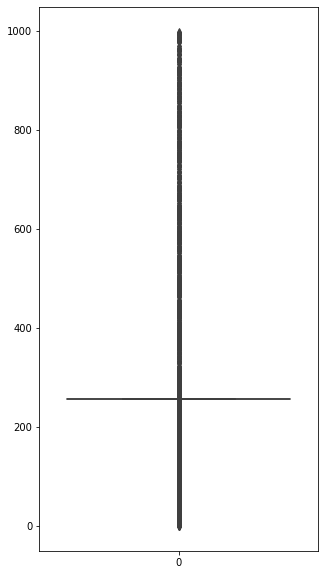

count    4830.000000
mean      257.136853
std       153.135424
min         0.000000
25%       257.000000
50%       257.000000
75%       257.000000
max       999.000000
Name: ratings, dtype: float64


In [33]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['ratings'])
plt.show()

print(data['ratings'].describe())

- the mean value is also same as median, which suggests that the distribution of the data points is approximately symmetric.
- minimum value in your dataset is 0 and the maximum value is 999, This indicates that there are some extreme values in your dataset that are significantly higher or lower than the majority of the data points.
- These extreme values are also known as outliers.

**Let handle outliers in rating column**

In [34]:
# Calculate the IQR for the ratings column
q1 = data['ratings'].quantile(0.25)
q3 = data['ratings'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_ratings =data[(data['ratings'] < lower_bound) | (data['ratings'] > upper_bound)].count()
outliers_ratings

book title    1512
ratings       1512
avg_score     1512
author        1512
score         1512
votes         1512
dtype: int64

Based on the above code:
- we can calculate the interquartile range (IQR) by subtracting the first quartile (Q1) from the third quartile (Q3). 
After obtaining the IQR value, we can consider any value below Q1 - 1.5IQR or above Q3 + 1.5IQR as outliers. 

- These are the values that deviate significantly from the rest of the data points and can skew the analysis results. 
Therefore, we need to detect and handle these outliers before performing any further analysis on the dataset.

In [35]:
median = np.median(data['ratings'])
data.loc[(data['ratings'] < lower_bound) | (data['ratings'] > upper_bound), 'ratings'] = median

c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='ratings', ylabel='Count'>

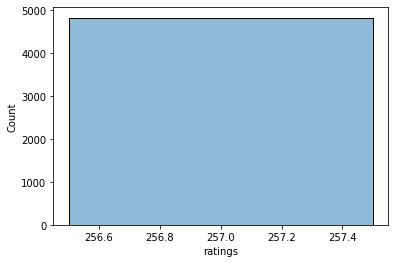

In [36]:
sns.histplot(data=data, x="ratings", kde=True)
sns.kdeplot(data=data, x="ratings")

In [37]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['ratings'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')


Data looks normally distributed (fail to reject H0)


c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


The code above performs a Shapiro-Wilk which is statistical test test to check whether the data in the 'avg_score' column of a pandas DataFrame 'data' is normally distributed or not.

**2. Avg_score column**

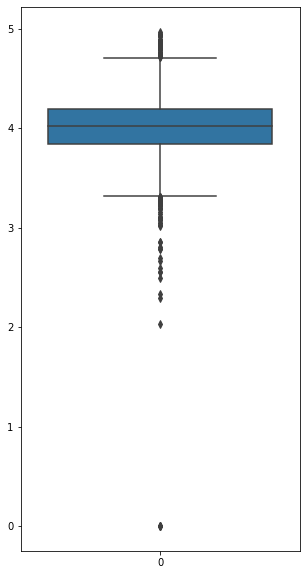

count    4823.000000
mean        4.007846
std         0.311307
min         0.000000
25%         3.840000
50%         4.020000
75%         4.190000
max         4.970000
Name: avg_score, dtype: float64


In [38]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['avg_score'])
plt.show()

print(data['avg_score'].describe())


**Let handle outliers in avg_score column**

In [39]:
# Calculate the IQR for the votes column
q1 = data['avg_score'].quantile(0.25)
q3 = data['avg_score'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_avg =data[(data['avg_score'] < lower_bound) | (data['avg_score'] > upper_bound)].count()
outliers_avg

book title    109
ratings       109
avg_score     109
author        109
score         109
votes         109
dtype: int64

In [40]:
median = np.median(data['avg_score'])
data.loc[(data['avg_score'] < lower_bound) | (data['avg_score'] > upper_bound), 'avg_score'] = median

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

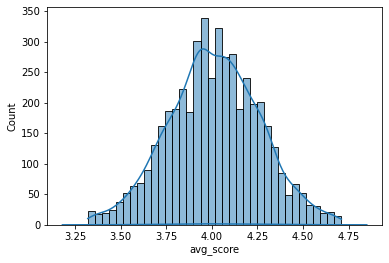

In [41]:
sns.histplot(data=data, x="avg_score", kde=True)
sns.kdeplot(data=data, x="avg_score")

In [42]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['avg_score'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data looks normally distributed (fail to reject H0)


**3. votes**

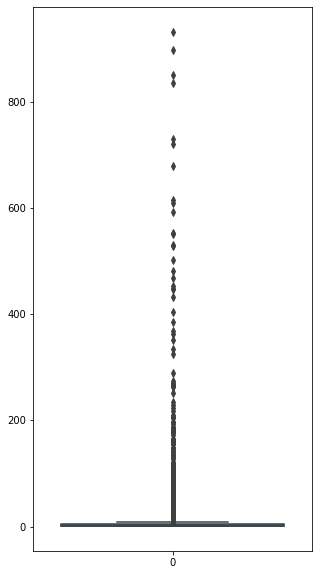

count    4830.000000
mean       10.592547
std        49.070288
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       932.000000
Name: votes, dtype: float64


In [43]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['votes'])
plt.show()

print(data['votes'].describe())

**Let handle outliers in votes column**

In [44]:
# Calculate the IQR for the votes column
q1 = data['votes'].quantile(0.25)
q3 = data['votes'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_votes =data[(data['votes'] < lower_bound) | (data['votes'] > upper_bound)].count()
outliers_votes

book title    687
ratings       687
avg_score     686
author        687
score         687
votes         687
dtype: int64

This code will calculate the IQR for the votes column and then identify any potential outliers that fall below the lower bound or above the upper bound.

In [45]:
median = np.median(data['votes'])
data.loc[(data['votes'] < lower_bound) | (data['votes'] > upper_bound), 'votes'] = median

<AxesSubplot: xlabel='votes', ylabel='Count'>

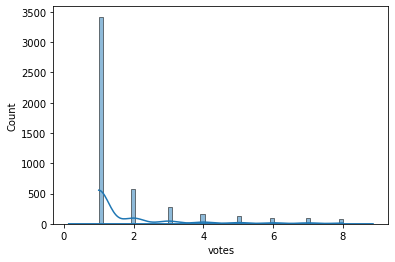

In [46]:
sns.histplot(data=data, x="votes", kde=True)
sns.kdeplot(data=data, x="votes")

In [47]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['votes'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data does not look normally distributed (reject H0)


In [48]:
# Perform log transformation on the 'ratings' column
data['votes_log'] = np.log(data['votes'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['votes_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.630, p=0.000
Data does not look normally distributed (reject H0)


This code performs log transformation on the 'votes' column using the numpy library's log function. The purpose of log transformation is to normalize the data and reduce the influence of extreme values.

After performing the transformation, the Shapiro-Wilk test from the scipy.stats library is used to check if the transformed data is normally distributed or not. The Shapiro-Wilk test tests the null hypothesis that the data is normally distributed.

<AxesSubplot: xlabel='votes_log', ylabel='Count'>

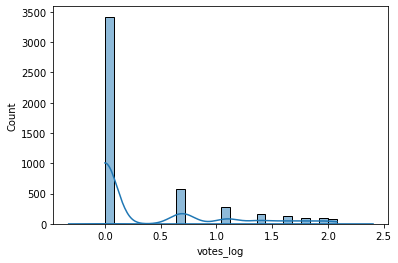

In [49]:
sns.histplot(data=data, x="votes_log", kde=True)
sns.kdeplot(data=data, x="votes_log")

**4. score**

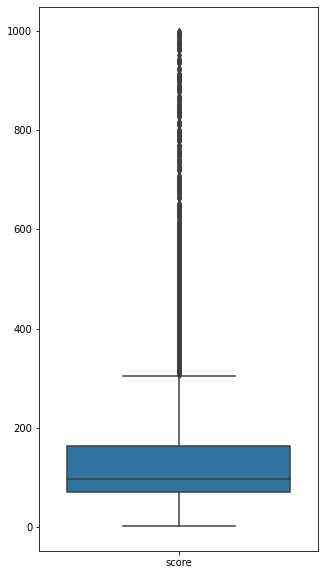

count    4830.000000
mean      154.328157
std       178.661618
min         1.000000
25%        69.000000
50%        96.000000
75%       163.750000
max       999.000000
Name: score, dtype: float64


In [50]:
score=pd.DataFrame(data, columns=['score'])
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=score)
plt.show()
print(data['score'].describe())

**Let handle outliers in score column**

In [51]:
# Calculate the IQR for the votes column
q1 = data['score'].quantile(0.25)
q3 = data['score'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_score =data[(data['score'] < lower_bound) | (data['score'] > upper_bound)].count()
outliers_score

book title    618
ratings       618
avg_score     615
author        618
score         618
votes         618
votes_log     618
dtype: int64

In [53]:
median = np.median(data['score'])
data.loc[(data['score'] < lower_bound) | (data['score'] > upper_bound), 'score'] = median

In [54]:
# Perform log transformation on the 'ratings' column
data['votes_log'] = np.log(data['votes'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['votes_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.630, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='score', ylabel='Count'>

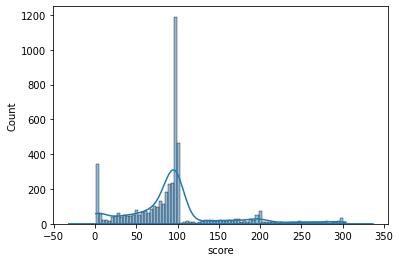

In [55]:
sns.histplot(data=data, x="score", kde=True)
sns.kdeplot(data=data, x="score")

distribution lightly skewded 

In [56]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['score'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data does not look normally distributed (reject H0)


data didnot distributed normally,
- let's do log transformation on them

In [57]:
# Perform log transformation on the 'score' column
data['score_log'] = np.log(data['score'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['score_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.678, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='score', ylabel='Count'>

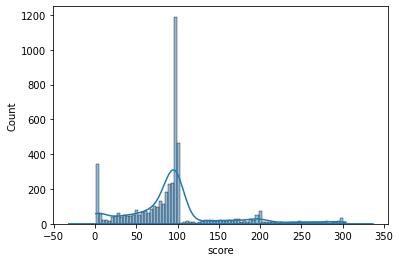

In [58]:
sns.histplot(data=data, x="score", kde=True)
sns.kdeplot(data=data, x="score")

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4830 non-null   object 
 1   ratings     4830 non-null   float64
 2   avg_score   4714 non-null   float64
 3   author      4830 non-null   object 
 4   score       4830 non-null   float64
 5   votes       4830 non-null   float64
 6   votes_log   4830 non-null   float64
 7   score_log   4830 non-null   float64
dtypes: float64(6), object(2)
memory usage: 468.6+ KB


In [60]:
data['avg_score'].isna().sum()

116

In [61]:
data['avg_score'].fillna(data['avg_score'].median(), inplace=True)

In [62]:
data=data.drop(["score_log","votes_log"],axis='columns')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4830 non-null   object 
 1   ratings     4830 non-null   float64
 2   avg_score   4830 non-null   float64
 3   author      4830 non-null   object 
 4   score       4830 non-null   float64
 5   votes       4830 non-null   float64
dtypes: float64(4), object(2)
memory usage: 393.2+ KB


In [64]:
data.describe()

,ratings,avg_score,score,votes
count,4830.0,4830.000000,4830.000000,4830.000000
mean,257.0,4.013646,95.413872,1.768116
std,0.0,0.248715,59.822371,1.565726
min,257.0,3.320000,1.000000,1.000000
25%,257.0,3.850000,69.000000,1.000000
50%,257.0,4.020000,96.000000,1.000000
75%,257.0,4.180000,100.000000,2.000000
max,257.0,4.710000,304.000000,8.000000


## Exploratory Data Analysis

In [65]:
data.head(5)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,257.0,4.28,Jane Austen,237.0,1.0
1,"Fifty Shades of Grey (Fifty Shades, #1)",257.0,3.66,E.L. James,231.0,1.0
2,"Beautiful Disaster (Beautiful, #1)",257.0,4.04,Jamie McGuire,216.0,1.0
3,"Twilight (The Twilight Saga, #1)",257.0,3.64,Stephenie Meyer,138.0,1.0
4,"The Notebook (The Notebook, #1)",257.0,4.14,Nicholas Sparks,98.0,1.0


In [66]:
print("number of author",data.author.nunique())

number of author 2391


In [67]:
print("TOp 10 highest book writers")
print(data['author'].value_counts().head(10))

TOp 10 highest book writers
Nora Roberts                68
Kristen Ashley              34
Lisa Kleypas                31
Suzanne Halliday            30
Ella Fox                    26
Julia Quinn                 26
Eloisa James                24
Nalini Singh                24
Lora Leigh                  20
Susan Elizabeth Phillips    20
Name: author, dtype: int64


In [68]:
dfvalued=data.groupby(['author'])['votes'].sum().reset_index()

dfvalued.sort_values(by="votes",ascending=False).head(10)

,author,votes
1777,Nora Roberts,129.0
1288,Kristen Ashley,91.0
1355,Laurann Dohner,73.0
1721,Nalini Singh,67.0
1445,Lisa Kleypas,57.0
2264,Tessa Dare,55.0
2038,Sarah J. Maas,53.0
769,Gena Showalter,53.0
661,Eloisa James,52.0
771,Georgette Heyer,49.0


In [69]:
# Filter the data to only include books by the Nora Roberts author
author_df = data[data['author'] == 'Nora Roberts'	]
grouped = author_df.groupby('book title')['votes'].sum().reset_index()
sorted_books = grouped.sort_values(by='votes', ascending=False).head(10)
sorted_books

,book title,votes
34,"Key of Valor (Key Trilogy, #3)",7.0
45,River's End,7.0
52,The Heart of Devin MacKade (The MacKade Brothe...,7.0
15,"Daring to Dream (Dream Trilogy, #1)",6.0
61,The Search,6.0
5,"Blue Dahlia (In the Garden, #1)",5.0
33,"Key of Light (Key Trilogy, #1)",5.0
4,"Blood Brothers (Sign of Seven, #1)",5.0
3,"Black Rose (In the Garden, #2)",5.0
7,"Born in Ice (Born In Trilogy, #2)",4.0


In [70]:
dfvalued=data.groupby(['author'])['votes'].sum().reset_index()
dfvalued.sort_values(by="votes",ascending=False).head(10)

,author,votes
1777,Nora Roberts,129.0
1288,Kristen Ashley,91.0
1355,Laurann Dohner,73.0
1721,Nalini Singh,67.0
1445,Lisa Kleypas,57.0
2264,Tessa Dare,55.0
2038,Sarah J. Maas,53.0
769,Gena Showalter,53.0
661,Eloisa James,52.0
771,Georgette Heyer,49.0


In [71]:
dfvalued=data.groupby(['book title','author'],as_index=False).votes.max()
print("Top 10 books by  votes  ")
dfvalued.sort_values(by="votes",ascending=False).head(10)

Top 10 books by  votes  


,book title,author,votes
2099,"Living Dead in Dallas (Sookie Stackhouse, #2)",Charlaine Harris,8.0
3752,"The Gravity of Us (Elements, #4)",Brittainy C. Cherry,8.0
733,"Chain Reaction (Perfect Chemistry, #3)",Simone Elkeles,8.0
1778,"If You Desire (MacCarrick Brothers, #2)",Kresley Cole,8.0
3633,"The Darkest Kiss (Lords of the Underworld, #2)",Gena Showalter,8.0
1776,"If You Dare (MacCarrick Brothers, #1)",Kresley Cole,8.0
2880,Remembrance,Jude Deveraux,8.0
3569,"The Bride and the Beast (Once Upon a Time, #2)",Teresa Medeiros,8.0
2857,"Red Queen (Red Queen, #1)",Victoria Aveyard,8.0
4798,Your Bloods Eve,Linda Jawish,8.0


In [72]:
dfvalued=data.groupby(['book title','author'],as_index=False).ratings.max()
print("Top 10 books by rating")
dfvalued.sort_values(by="ratings",ascending=False).head(10)

Top 10 books by rating


,book title,author,ratings
0,"#Hater (Hashtag, #2)",Cambria Hebert,257.0
3226,"Slightly Dangerous (Bedwyn Saga, #6)",Mary Balogh,257.0
3224,"Sleigh Bells in the Snow (O'Neil Brothers,#1)",Sarah Morgan,257.0
3223,"Sleepless in Scotland (MacLean Curse, #4)",Karen Hawkins,257.0
3222,"Sleeping With the Wolf (After the Crash, #1)",Maddy Barone,257.0
3221,"Slay Me (Rock Gods, #2)",Joanna Blake,257.0
3220,"Slave to Sensation (Psy-Changeling, #1)",Nalini Singh,257.0
3219,"Slave (Finding Anna, #1)",Sherri Hayes,257.0
3218,"Slammed (Slammed, #1)",Colleen Hoover,257.0
3217,"Slade (Walk of Shame, #1)",Victoria Ashley,257.0


In [82]:
from tabulate import tabulate
grouped = data.groupby(['book title', 'author']).agg({'ratings': 'mean', 'votes': 'sum', 'avg_score': 'mean','score': 'mean' }).reset_index()
sorted_books = grouped.sort_values(by=['ratings', 'votes', 'avg_score'], ascending=False)
top_books= sorted_books.head(10)

print("Top 10 books by ratings, votes, and average score:")
# Print the data as a table using tabulate for better view
print(tabulate(top_books, headers="keys", tablefmt="grid"))

Top 10 books by ratings, votes, and average score:
+------+----------------------------------------------------+------------------------+-----------+---------+-------------+---------+
|      | book title                                         | author                 |   ratings |   votes |   avg_score |   score |
+======+====================================================+========================+===========+=========+=============+=========+
| 1174 | Empire of Storms (Throne of Glass, #5)             | Sarah J. Maas          |       257 |       8 |        4.57 |      96 |
+------+----------------------------------------------------+------------------------+-----------+---------+-------------+---------+
| 2929 | Rock Chick Redemption (Rock Chick, #3)             | Kristen Ashley         |       257 |       8 |        4.41 |      96 |
+------+----------------------------------------------------+------------------------+-----------+---------+-------------+---------+
|  792 | City of H

In [92]:
from textblob import TextBlob
# create a new column for sentiment analysis
data['sentiment'] = data['book title'].apply(lambda x: TextBlob(x).sentiment.polarity)
positive_rom_books = data[data['sentiment'] > 0]
positive_rom_books.head(10)

,book title,ratings,avg_score,author,score,votes,sentiment
2,"Beautiful Disaster (Beautiful, #1)",257.0,4.04,Jamie McGuire,216.0,1.0,0.850000
5,"Perfect Chemistry (Perfect Chemistry, #1)",257.0,4.05,Simone Elkeles,98.0,1.0,1.000000
10,"Easy (Contours of the Heart, #1)",257.0,4.08,Tammara Webber,69.0,1.0,0.433333
28,"Love Unscripted (Love, #1)",257.0,4.02,Tina Reber,36.0,1.0,0.500000
43,"Flat-Out Love (Flat-Out Love, #1)",257.0,3.99,Jessica Park,21.0,1.0,0.500000
52,Just the Sexiest Man Alive,257.0,3.92,Julie James,18.0,1.0,0.100000
56,"The Summer I Turned Pretty (Summer, #1)",257.0,3.82,Jenny Han,16.0,1.0,0.250000
64,"Natural Born Charmer (Chicago Stars, #7)",257.0,4.15,Susan Elizabeth Phillips,14.0,1.0,0.100000
70,The Sweet Gum Tree,257.0,4.26,Katherine Allred,14.0,1.0,0.350000
73,Going Too Far,257.0,3.92,Jennifer Echols,13.0,1.0,0.100000


 The positive romantic books can be considered as feel-good and heartwarming reads, perfect for those who enjoy stories of love and passion.

In [97]:
positive_books_by_author = positive_rom_book.groupby('author')['sentiment'].count()
positive_books_by_author = positive_books_by_author.sort_values(ascending=False)
#print the top author with the most positive sentimental books
print('Author with most positive sentimental books: ', positive_books_by_author.head(10))

Author with most positive sentimental books:  author
Nora Roberts                9
Mari Carr                   8
Jay Crownover               8
Julia Quinn                 8
Susan Elizabeth Phillips    7
Marie Force                 7
Christina Lauren            6
Kristen Ashley              6
Lisa Kleypas                6
Laurann Dohner              6
Name: sentiment, dtype: int64


**Conclusions:**

- There were some inaccurate values in the dataset which were removed to clean the data.
- The data was converted to the appropriate data types for further analysis.
- Outliers were detected and handled to remove the data noise.
- Sentiment analysis was performed on the book titles to identify the positive and negative books.

Overall, the analysis revealed some interesting insights about the books dataset, which can be used to make informed decisions for further analysis or decision making. However, further analysis could be performed on this dataset to extract more insights and patterns.